In [5]:
%load_ext autoreload
%autoreload 2

In [1]:
import dataloaders
import torch
import curv_new
import gaussian_mixture
import manifolds
import seaborn as sns
import numpy as np
import curvature
import mani
import numpy as np
import matplotlib.pyplot as plt
import math
import delta
import Gu_method

Estimation method:

1. Sectional curvature
2. Scalar curvature (Hickok and Blumberg)
3. Delta-hyperbolicity


Things to tweak:

1. Number of dimensions
2. Curvature
3. Number of samples
4. Downsampling distance matrix samples (e.g. down from n^4)
5. Changing the actual number of points drawn from the Gaussian
Number of clusters


Other changes:

1. k-NN graphs for sectional curvatureP robably will need to use Kruskal’s algorithm to join subgraphs
2. Adding gaussian noise to distance matrix?
3. CS-PhD to dense graph

Number of dimensions, box plot, maybe violin
Does adding an edge to a tree break the tree? Krusgal Algorithm
Is dense graph always spherical?

/opt/anaconda3/lib/python3.12/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


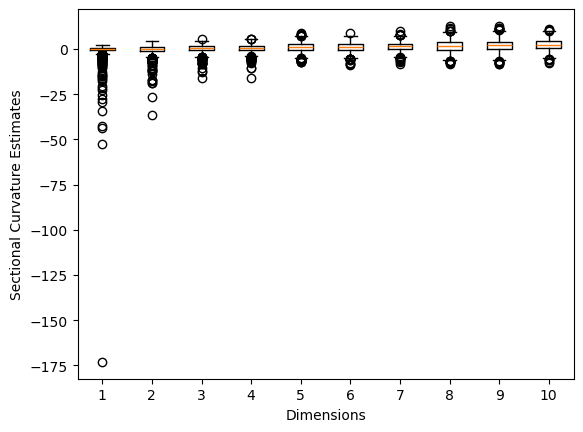

In [ ]:
# Gu's method
dim_values = range(1, 11)
boxplot_data = []
for dim in dim_values:
    pm = manifolds.ProductManifold(signature=[(-1, dim)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    samples = Gu_method.estimate(dists, 1000, 1000)
    boxplot_data.append(samples)  # Collect samples for the box plot

# Create a box plot
plt.boxplot(boxplot_data, labels=dim_values)
plt.xlabel("Dimensions")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices


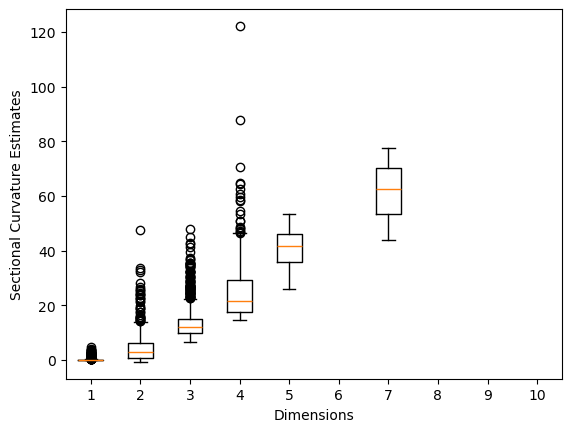

In [ ]:
# Hickok's method
dim_values = range(1, 11)
boxplot_data = []
for dim in dim_values:
    pm = manifolds.ProductManifold(signature=[(-1, dim)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    R = dists.detach().numpy()
    sce = curvature.scalar_curvature_est(dim, Rdist=R)
    Ss = sce.estimate(rmax=2)  # should I change the rmax ?
    boxplot_data.append(Ss)  # Collect samples for the box plot

# Create a box plot
plt.boxplot(boxplot_data, labels=dim_values)
plt.xlabel("Dimensions")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

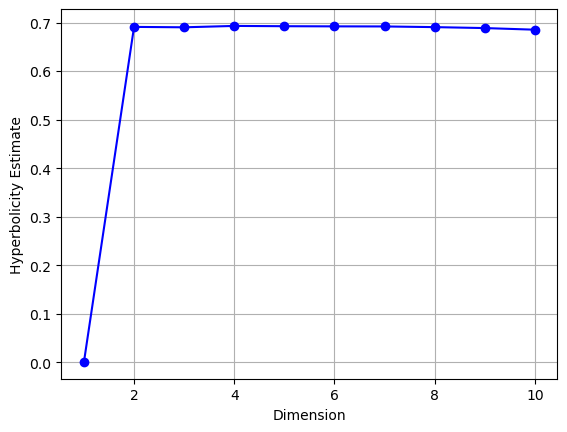

In [ ]:
# Delta hyperbolicty method
dims = []
dim_values = range(1, 11)
hyps = []

for dim in dim_values:
    pm = manifolds.ProductManifold(signature=[(-1, dim)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    hyp = delta.delta_hyp(dists.detach().numpy())
    hyps.append(hyp)

plt.plot(dim_values, hyps, marker="o", linestyle="-", color="b")
plt.xlabel("Dimension")
plt.ylabel("Hyperbolicity Estimate")
plt.grid(True)
plt.show()

In [ ]:
# Curvature from -5 to 5

/opt/anaconda3/lib/python3.12/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


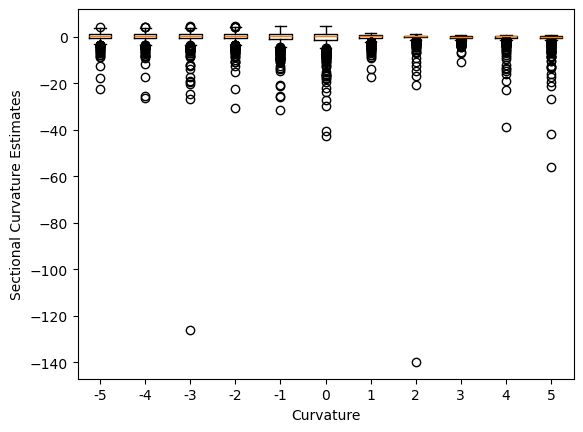

In [ ]:
# Gu's method
cur_values = range(-5, 6)
boxplot_data = []
for cur in cur_values:
    pm = manifolds.ProductManifold(signature=[(cur, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    samples = Gu_method.estimate(dists, 1000, 1000)
    boxplot_data.append(samples)  # Collect samples for the box plot

# Create a box plot
plt.boxplot(boxplot_data, labels=cur_values)
plt.xlabel("Curvature")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

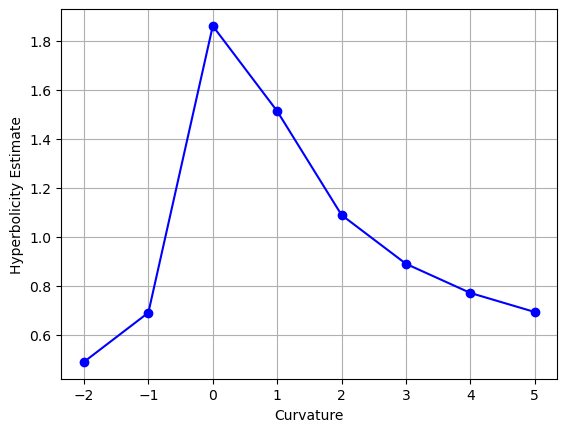

In [ ]:
hyps = []
cur_values = range(-5, 6)
for cur in cur_values:
    pm = manifolds.ProductManifold(signature=[(cur, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    hyp = delta.delta_hyp(dists.detach().numpy())
    hyps.append(hyp)

# Create a box plot
plt.plot(cur_values, hyps, marker="o", linestyle="-", color="b")
plt.xlabel("Curvature")
plt.ylabel("Hyperbolicity Estimate")
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices


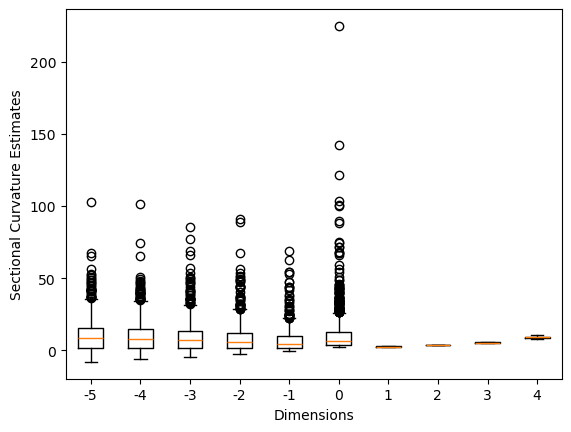

In [ ]:
curs = range(-5, 5)
boxplot_data = []
for cur in curs:
    pm = manifolds.ProductManifold(signature=[(cur, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    R = dists.detach().numpy()
    sce = curvature.scalar_curvature_est(2, Rdist=R)
    if cur < 0:
        max = (math.pi) / 2
    elif cur == 0:
        max = 1
    else:
        max = 2
    Ss = sce.estimate(rmax=max)  # should I change the rmax ?
    boxplot_data.append(Ss)  # Collect samples for the box plot

# Create a box plot
plt.boxplot(boxplot_data, labels=curs)
plt.xlabel("Dimensions")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

In [ ]:
import delta

dims = []
dim_values = range(1, 11)
boxplot_data = []
for dim in dim_values:
    pm = manifolds.ProductManifold(signature=[(-1, dim)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    samples, mean, std = delta.batched_delta_hyp(dists.detach().numpy(), n_tries=1000, batch_size=1000)
    boxplot_data.append(samples)  # Collect samples for the box plot
    dims.append(dim)

# Create a box plot
plt.boxplot(boxplot_data, labels=dims)
plt.xlabel("Dimensions")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

All distance matrices saved.


In [ ]:
# maybe try implementing a simple postprocessing thing

In [ ]:
# Number of Sample

/opt/anaconda3/lib/python3.12/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


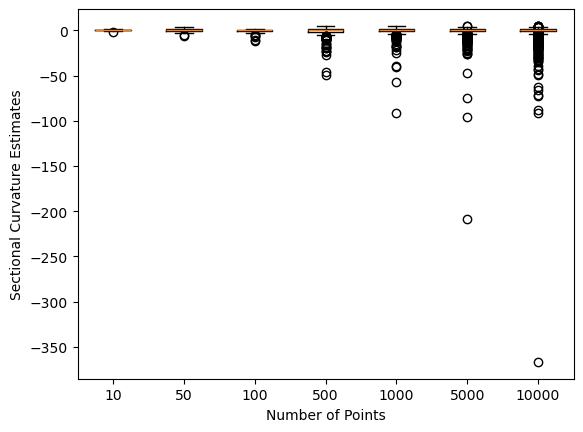

In [ ]:
# Gu's
samples = [10, 50, 100, 500, 1000, 5000, 10000]
# samples=[10,100,1000,10000,100000]
boxplot_data = []
for sample in samples:
    pm = manifolds.ProductManifold(signature=[(-1, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_points=sample, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    cur = Gu_method.estimate(dists, sample, sample)
    boxplot_data.append(cur)  # Collect samples for the box plot
plt.boxplot(boxplot_data, labels=samples)
plt.xlabel("Number of Points")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

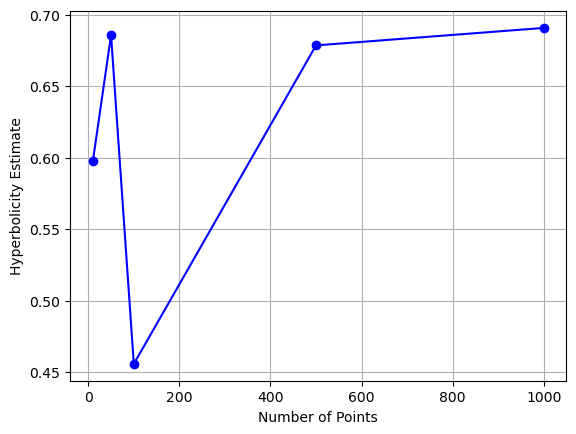

In [ ]:
# Delta
new_samples = [10, 50, 100, 500, 1000]
hyps = []
for sample in new_samples:
    pm = manifolds.ProductManifold(signature=[(-1, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_points=sample, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    hyp = delta.delta_hyp(dists.detach().numpy())
    hyps.append(hyp)  # Collect samples for the box plot

# Create a box plot
plt.plot(new_samples, hyps, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Points")
plt.ylabel("Hyperbolicity Estimate")
plt.grid(True)
plt.show()

computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices


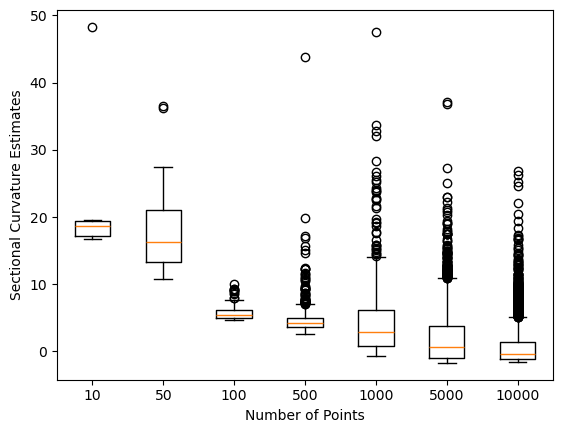

In [ ]:
# Hickok
samples = [10, 50, 100, 500, 1000, 5000, 10000]
boxplot_data = []
for sample in samples:
    pm = manifolds.ProductManifold(signature=[(-1, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_points=sample, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    R = dists.detach().numpy()
    sce = curvature.scalar_curvature_est(2, Rdist=R)
    Ss = sce.estimate(rmax=2)  # should I change the rmax ?
    boxplot_data.append(Ss)  # Collect samples for the box plot
plt.boxplot(boxplot_data, labels=samples)
plt.xlabel("Number of Points")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

In [ ]:
# do an experiment of dense graph vs cs.phd, could we do deep learning for distance matrice?

/opt/anaconda3/lib/python3.12/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices


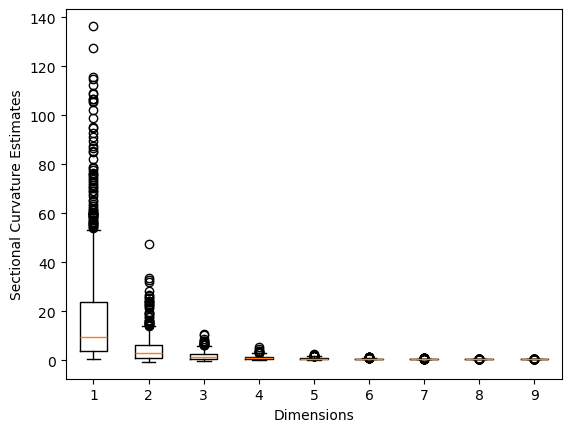

In [ ]:
curs = range(1, 10)
boxplot_data = []
for max in curs:
    pm = manifolds.ProductManifold(signature=[(-1, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_clusters=1, num_classes=1, seed=1)
    dists = pm.pdist(X)
    R = dists.detach().numpy()
    sce = curvature.scalar_curvature_est(2, Rdist=R)
    Ss = sce.estimate(rmax=max)  # should I change the rmax ?
    boxplot_data.append(Ss)  # Collect samples for the box plot

# Create a box plot
plt.boxplot(boxplot_data, labels=curs)
plt.xlabel("Dimensions")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


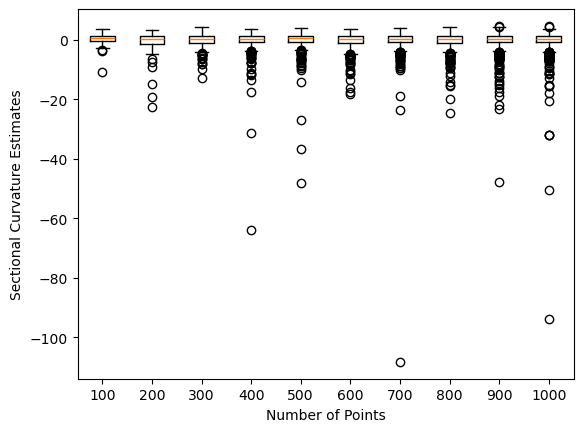

In [ ]:
# Downsampling
samples = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# samples=[10,100,1000,10000,100000]
boxplot_data = []
pm = manifolds.ProductManifold(signature=[(-1, 2)])
X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_points=1000, num_clusters=1, num_classes=1, seed=1)
dists = pm.pdist(X)
for sample in samples:
    cur = Gu_method.estimate(dists, sample, sample)
    boxplot_data.append(cur)  # Collect samples for the box plot
plt.boxplot(boxplot_data, labels=samples)
plt.xlabel("Number of Points")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


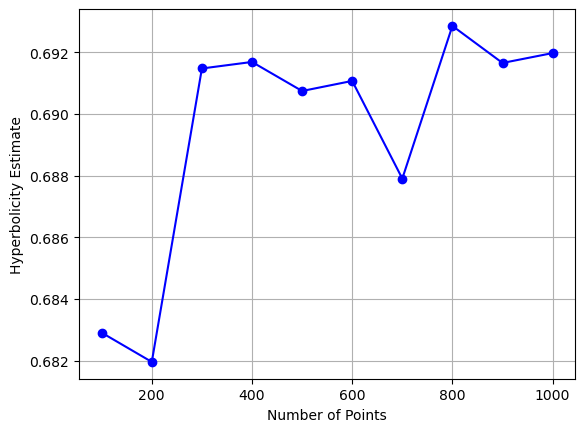

In [ ]:
new_samples = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
hyps = []
pm = manifolds.ProductManifold(signature=[(-1, 2)])
X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_points=sample, num_clusters=1, num_classes=1, seed=1)
dists = pm.pdist(X)

for downsample_size in new_samples:
    indices = np.random.choice(sample, size=downsample_size, replace=False)  # Random indices
    downsampled_dists = dists[indices][:, indices]

    hyp = delta.delta_hyp(downsampled_dists.detach().numpy())
    hyps.append(hyp)  # Collect estimates for the plot

# Create a line plot
plt.plot(new_samples, hyps, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Points")
plt.ylabel("Hyperbolicity Estimate")
plt.grid(True)
plt.show()

computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices


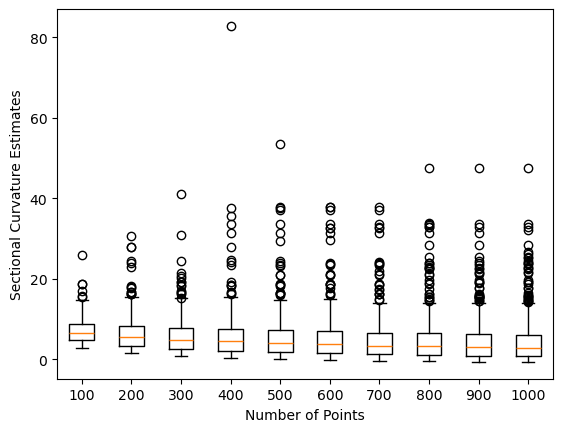

In [ ]:
samples = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# samples=[10,100,1000,10000,100000]
boxplot_data = []
pm = manifolds.ProductManifold(signature=[(-1, 2)])
X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_points=1000, num_clusters=1, num_classes=1, seed=1)
dists = pm.pdist(X)
for sample in samples:
    indices = np.random.choice(sample, size=sample, replace=False)  # Random indices
    downsampled_dists = dists[indices][:, indices]
    R = downsampled_dists.detach().numpy()
    sce = curvature.scalar_curvature_est(2, Rdist=R)
    Ss = sce.estimate(rmax=2)
    boxplot_data.append(Ss)
plt.boxplot(boxplot_data, labels=samples)
plt.xlabel("Number of Points")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

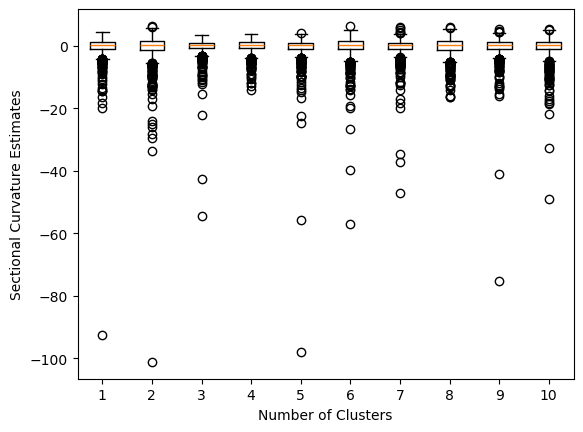

/opt/anaconda3/lib/python3.12/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


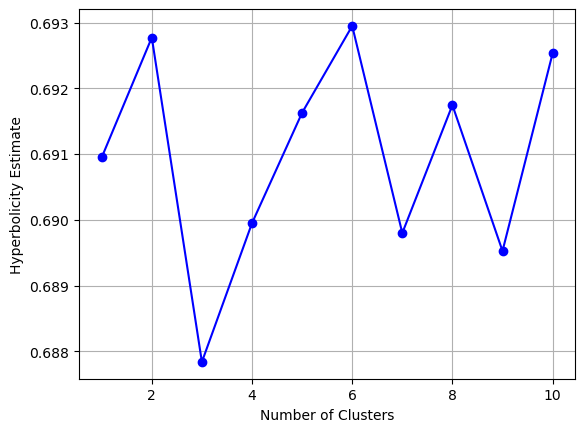

computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices
computed density
computed nearest neighbor matrices


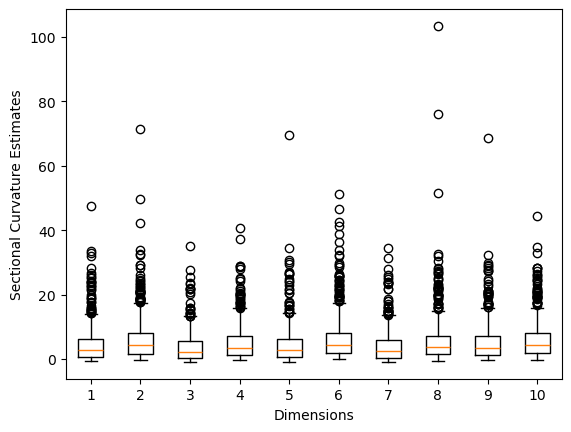

In [ ]:
# Number of cluster, do some calibration with tree generator
samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
boxplot_data = []
for i in range(1, 11):
    pm = manifolds.ProductManifold(signature=[(-1, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_points=1000, num_clusters=i, num_classes=1, seed=1)
    dists = pm.pdist(X)
    cur = Gu_method.estimate(dists, 1000, 1000)
    boxplot_data.append(cur)  # Collect samples for the box plot
plt.boxplot(boxplot_data, labels=samples)
plt.xlabel("Number of Clusters")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

hyps = []
for i in range(1, 11):
    pm = manifolds.ProductManifold(signature=[(-1, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_points=1000, num_clusters=i, num_classes=1, seed=1)
    dists = pm.pdist(X)
    hyp = delta.delta_hyp(dists.detach().numpy())
    hyps.append(hyp)  # Collect estimates for the plot

# Create a line plot
plt.plot(samples, hyps, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters")
plt.ylabel("Hyperbolicity Estimate")
plt.grid(True)
plt.show()

boxplot_data = []
for i in range(1, 11):
    pm = manifolds.ProductManifold(signature=[(-1, 2)])
    X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_clusters=i, num_classes=1, seed=1)
    dists = pm.pdist(X)
    R = dists.detach().numpy()
    sce = curvature.scalar_curvature_est(2, Rdist=R)
    Ss = sce.estimate(rmax=2)  # should I change the rmax ?
    boxplot_data.append(Ss)  # Collect samples for the box plot

# Create a box plot
plt.boxplot(boxplot_data, labels=samples)
plt.xlabel("Dimensions")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

In [ ]:
import networkx as nx
import numpy as np

pm = manifolds.ProductManifold(signature=[(-1, 2)])
X, y = gaussian_mixture.gaussian_mixture(pm=pm, num_points=1000, num_clusters=1, num_classes=1, seed=1)
dists = pm.pdist(X)
R = dists.detach().numpy()

k = 2
G = nx.Graph()

num_nodes = len(R)
G.add_nodes_from(range(num_nodes))

for i in range(num_nodes):
    nearest_neighbors = np.argsort(R[i])[1 : k + 1]
    for neighbor in nearest_neighbors:
        G.add_edge(i, neighbor, weight=R[i, neighbor])

is_connected = nx.is_connected(G)
if not is_connected:
    components = list(nx.connected_components(G))
    supergraph = nx.Graph()

    for i, comp1 in enumerate(components):
        for j, comp2 in enumerate(components):
            if i < j:  # Avoid duplicate pairs
                min_distance = float("inf")
                closest_pair = None
                for node1 in comp1:
                    for node2 in comp2:
                        if R[node1, node2] < min_distance:
                            min_distance = R[node1, node2]
                            closest_pair = (node1, node2)

                if closest_pair:
                    supergraph.add_edge(i, j, weight=min_distance)

    # Compute the minimum spanning tree (MST) of the supergraph
    mst_edges = nx.minimum_spanning_edges(supergraph, data=True)

    # Add these edges back to the original graph
    for edge in mst_edges:
        comp1, comp2, attr = edge
        # Retrieve the closest pair of nodes between these components
        for node1 in components[comp1]:
            for node2 in components[comp2]:
                if R[node1, node2] == attr["weight"]:
                    G.add_edge(node1, node2, weight=attr["weight"])
                    break

In [47]:
import signature_estimation

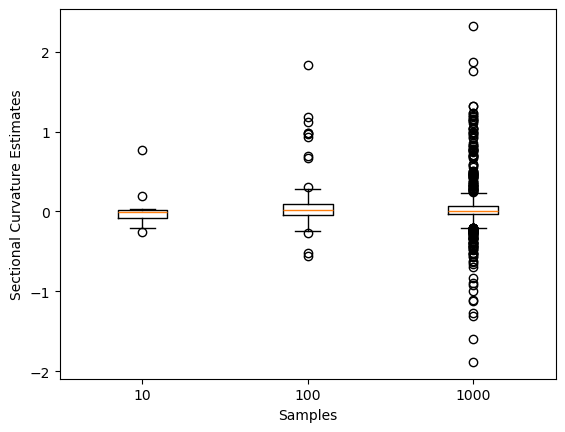

In [ ]:
Gu = []  # This will be a list of lists
num = [10, 100, 1000]

for iter in num:
    results = []  # Store results for the current sample size
    for _ in range(iter):
        _, result2 = signature_estimation.sectional_curvature_method(G, 5)
        results.append(result2)
    Gu.append(results)  # Append results for the current sample size

# Create the boxplot
plt.boxplot(Gu, labels=num)  # `Gu` and `num` now have compatible dimensions
plt.xlabel("Samples")
plt.ylabel("Sectional Curvature Estimates")
plt.show()

In [ ]:
def create_tree(n_leaves, scale=0.1):
    """
    :param n_leaves: Number of leaves
    :param scale: used when branch is 'random'
    :return: returns the tree
    """
    n_nodes = 2 * n_leaves - 1
    tree = nx.Graph()
    node_names = [n for n in range(n_nodes)]
    leaves = node_names[:n_leaves]
    root = node_names[-1]
    next_child = root - 1
    opt = np.zeros((n_nodes, n_nodes))

    for node in node_names[::-1]:  # iterate backwards
        if node in leaves:
            tree.add_node(node, type="leaf")
        else:
            # Connect children with node
            child_1 = next_child
            t_1 = np.random.exponential(scale)

            opt[node][child_1] = t_1

            tree.add_edge(node, child_1, weight=t_1)  # Use 'weight' instead of 't'
            child_2 = child_1 - 1
            t_2 = np.random.exponential(scale)

            opt[node][child_2] = t_2

            tree.add_edge(node, child_2, weight=t_2)  # Use 'weight' instead of 't'
            if node == root:
                tree.add_node(node, type="root")
            else:
                tree.add_node(node, type="internal")
            # Store ancestral data
            tree.add_node(node, children=[child_1, child_2])
            tree.add_node(child_1, parent=node, t=t_1)  # Add branch length to parent
            tree.add_node(child_2, parent=node, t=t_2)
            # Child for next node
            next_child -= 2

    for i in range(n_nodes):
        for j in range(n_nodes):
            if opt[i][j] == 0:
                opt[i][j] = np.random.exponential(scale)

    return tree, opt

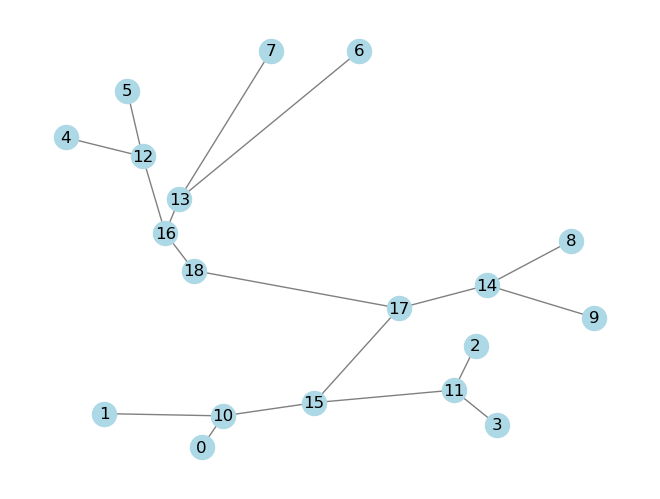

-0.04891988825296231


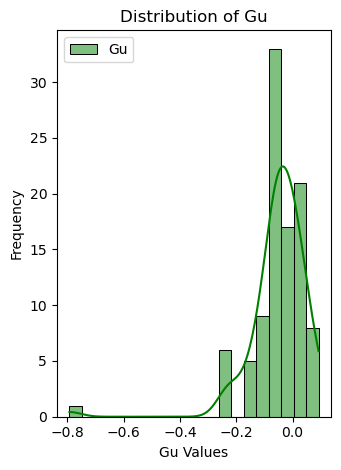

In [ ]:
import random

tree, opt = create_tree(10)
Gu = []
nx.draw(tree, with_labels=True, node_color="lightblue", edge_color="gray")

# Show the plot
plt.show()
for i in range(100):
    result1, result2 = signature_estimation.sectional_curvature_method(tree, 1)
    Gu.append(result2)

print(np.mean(Gu))
plt.subplot(1, 2, 2)
sns.histplot(Gu, kde=True, bins=20, color="green", label="Gu")
plt.xlabel("Gu Values")
plt.ylabel("Frequency")
plt.title("Distribution of Gu")
plt.legend()

plt.tight_layout()
plt.show()

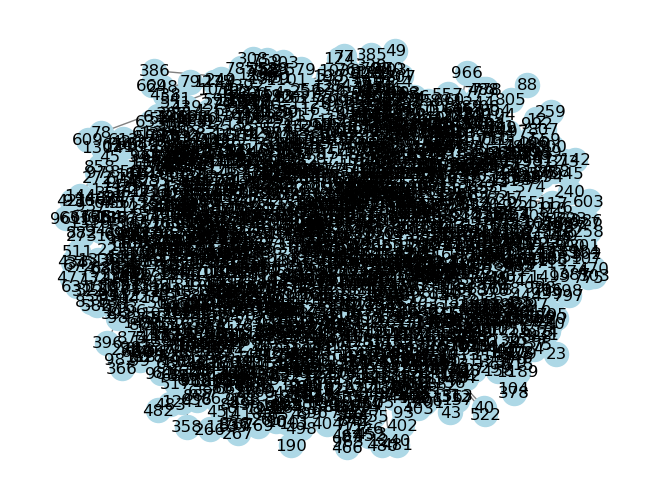

-0.03124084979672424


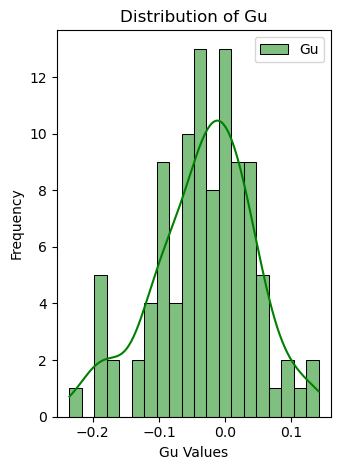

In [ ]:
import random

tree, opt = create_tree(1000)
Gu = []
nx.draw(tree, with_labels=True, node_color="lightblue", edge_color="gray")

# Show the plot
plt.show()
for i in range(100):
    result1, result2 = signature_estimation.sectional_curvature_method(tree, 1)
    Gu.append(result2)

print(np.mean(Gu))
plt.subplot(1, 2, 2)
sns.histplot(Gu, kde=True, bins=20, color="green", label="Gu")
plt.xlabel("Gu Values")
plt.ylabel("Frequency")
plt.title("Distribution of Gu")
plt.legend()

plt.tight_layout()
plt.show()

-3.8049999999999997


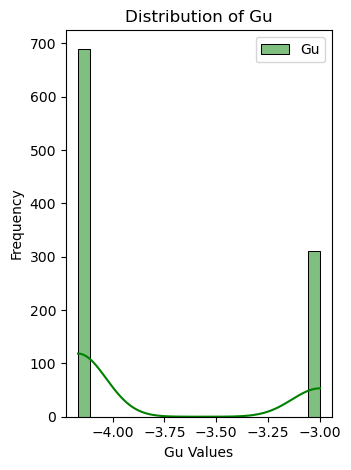

In [ ]:
G0 = nx.Graph()

G0.add_edges_from([("m", "b", {"weight": 3.0}), ("m", "c", {"weight": 5.0}), ("a", "m", {"weight": 3.0})])
Gu = []
for i in range(1000):
    result1, result2 = signature_estimation.sectional_curvature_method(G0, 1)
    Gu.append(result2)

print(np.mean(Gu))
plt.subplot(1, 2, 2)
sns.histplot(Gu, kde=True, bins=20, color="green", label="Gu")
plt.xlabel("Gu Values")
plt.ylabel("Frequency")
plt.title("Distribution of Gu")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def densify_graph(graph):
    dense_graph = graph.copy()
    nodes = list(dense_graph.nodes())
    for i, node1 in enumerate(nodes):
        for node2 in nodes[i + 1 :]:
            if not dense_graph.has_edge(node1, node2):
                # Add edge with a random weight
                weight = nx.shortest_path_length(graph, source=node1, target=node2, weight="weight")
                dense_graph.add_edge(node1, node2, weight=weight)

    return dense_graph

0.3971979166666666


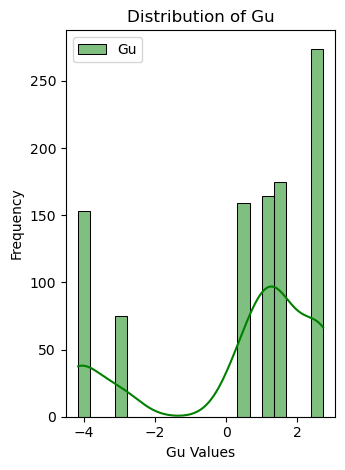

In [ ]:
g0 = densify_graph(G0)
Gu = []
for i in range(1000):
    result1, result2 = signature_estimation.sectional_curvature_method(g0, 1)
    Gu.append(result2)

print(np.mean(Gu))
plt.subplot(1, 2, 2)
sns.histplot(Gu, kde=True, bins=20, color="green", label="Gu")
plt.xlabel("Gu Values")
plt.ylabel("Frequency")
plt.title("Distribution of Gu")
plt.legend()

plt.tight_layout()
plt.show()

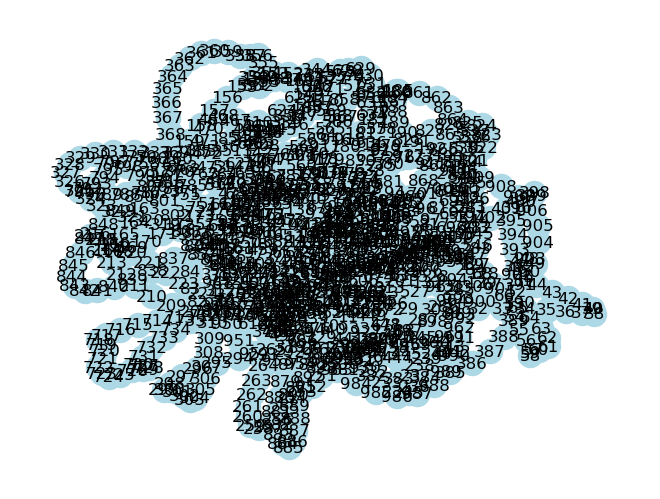

0.01684519722079212


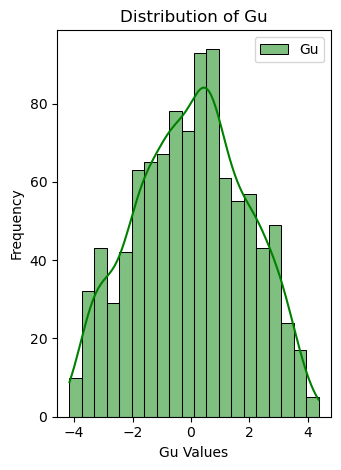

In [ ]:
cycle_graph = nx.cycle_graph(1000)
weight_range = (1, 10)
nx.draw(cycle_graph, with_labels=True, node_color="lightblue", edge_color="gray")
for u, v in cycle_graph.edges():
    weight = np.random.uniform(*weight_range)
    cycle_graph[u][v]["weight"] = round(weight, 2)


# Show the plot
plt.show()
Gu = []
for i in range(1000):
    result1, result2 = signature_estimation.sectional_curvature_method(cycle_graph, 1)
    Gu.append(result2)

print(np.mean(Gu))
plt.subplot(1, 2, 2)
sns.histplot(Gu, kde=True, bins=20, color="green", label="Gu")
plt.xlabel("Gu Values")
plt.ylabel("Frequency")
plt.title("Distribution of Gu")
plt.legend()

plt.tight_layout()
plt.show()